In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:

file_path = "diabetes.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)


data.columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())


print("\nDataset Description:")
print(data.describe())

# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())

# Display the Outcome distribution
print("\nDistribution of Outcomes (0: Non-Diabetic, 1: Diabetic):")
print(data["Outcome"].value_counts())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dataset Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1

In [5]:
# Replace zero values in certain columns with NaN (except Pregnancies and Outcome)
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    data[col].replace(0, np.nan, inplace=True)

# Fill missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Check for any remaining missing values
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\nsr96\AppData\Local\Temp\ipykernel_19272\2541101447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, np.nan, inplace=True)


In [6]:
# Split features (X) and target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Normalize feature values using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check shapes of training and testing data
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (614, 8)
Testing set shape: (154, 8)


In [8]:
# Set up KNN model and parameter grid for GridSearchCV
param_grid = {"n_neighbors": list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Train with cross-validation
grid_search.fit(X_train, y_train)

# Print the best K value
best_k = grid_search.best_params_["n_neighbors"]
print("Optimal K value:", best_k)


Optimal K value: 19


In [9]:
# Train the KNN model with the optimal value of K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)


Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



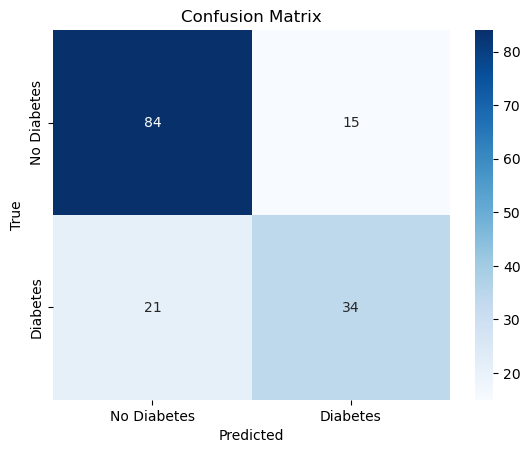

In [10]:
# Print accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Example new patient data
new_patient = [[6, 150, 72, 35, 0, 33.6, 0.627, 50]]  # Example patient input

# Normalize the new patient data using the same scaler
new_patient_scaled = scaler.transform(new_patient)

# Predict outcome for the new patient
prediction = knn.predict(new_patient_scaled)
print("Prediction for new patient:", "Diabetes" if prediction[0] == 1 else "No Diabetes")


Prediction for new patient: Diabetes


C:\Users\nsr96\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
